# Lending Club Analysis

### <font color='Maroon'>Analysis Working sheet by Shakeeb Pasha and Vishal Khera</font>

In [1]:
# Importing the libraries needed for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Setup environmental parameters
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 150)

In [2]:
# Loading the file provided
loan_data = pd.read_csv('loan/loan.csv', low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_data.shape

(39717, 111)

## Data Cleanup and Understanding

In [4]:
# Function to provide missing values % in descending order
def print_missing_value_percentage(df):
    print(round(100 * (df.isna().sum()/len(df.index)), 2).sort_values(ascending = False))

In [5]:
print('No of columns:', len(loan_data.columns))
print_missing_value_percentage(loan_data)

No of columns: 111
total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.

In [6]:
# drop columns with 100% missing na values
cleanedup_loan_data = loan_data.dropna(how='all', axis=1, inplace=False)
print('No of columns after dropping columns with 100% missing values:', len(cleanedup_loan_data.columns))

No of columns after dropping columns with 100% missing values: 57


In [7]:
# Lets check on the columns that have data - the quality of the data
cleanedup_loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [8]:
'''
From the above it makes sense to drop 
#   tax_liens, 
#   delinq_amnt, 
#   chargeoff_within_12_mths, 
#   acc_now_delinq, 
#   collections_12_mths_ex_med
as they all have 0 values for all statistical parameters,
which means they all have a 0 value across
'''
cleanedup_loan_data = cleanedup_loan_data.drop(['tax_liens','delinq_amnt', 'chargeoff_within_12_mths','acc_now_delinq', 'collections_12_mths_ex_med'], axis = 1)
cleanedup_loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,1,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,1,INDIVIDUAL,0.0


In [9]:
# Get list of columns that have only on data value in all rows, they dont have any value in our analysis
no_use_data = cleanedup_loan_data[[c for c in cleanedup_loan_data.columns if cleanedup_loan_data[c].nunique() == 1]]
no_use_data.head()

,pymnt_plan,initial_list_status,policy_code,application_type
0,n,f,1,INDIVIDUAL
1,n,f,1,INDIVIDUAL
2,n,f,1,INDIVIDUAL
3,n,f,1,INDIVIDUAL
4,n,f,1,INDIVIDUAL


In [10]:
# Drop the columns with single unique values
cleanedup_loan_data = cleanedup_loan_data[[c for c in cleanedup_loan_data.columns if cleanedup_loan_data[c].nunique() > 1]]
cleanedup_loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [11]:
# Remove columns we are not going to use e.g. URL
cleanedup_loan_data = cleanedup_loan_data.drop(['url'], axis = 1)
cleanedup_loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [12]:
# drop duplicate rows (if any)
cleanedup_loan_data = cleanedup_loan_data.drop_duplicates(subset=None, keep='first')
cleanedup_loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### Reuasable Functions

In [13]:
# Function to Plot a distribution given a dataframe and column
def head_and_line_plot(df, col, ptitle='Distribution', pxlabel='', pylabel='Count'):
    plt.figure(figsize=(12, 4))
    print(df[[col]].head())
    df[col].value_counts().plot()
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)   
    plt.show()

In [14]:
def head_and_bar_plot(df, col, ptitle='Distribution', pxlabel='', pylabel='Count'):
    plt.figure(figsize=(12, 4))
    print(df[[col]].head())
    df[col].value_counts().plot.bar()
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel) 
    plt.show()

In [15]:
def head_and_pie_plot(df, col, ptitle='Breakup'):
    plt.figure(figsize=(12, 4))
    print(df[[col]].head())
    df[col].value_counts().plot.pie(autopct='%.1f%%')
    plt.title(ptitle)
    plt.show()

## Univariate Analysis

In [16]:
# List of 47 Columns
cleanedup_loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

#### Variables
![variables](https://i.ibb.co/RTZv36Z/pic1.png)

### Categorical variables
#### Unordered categorical

  addr_state
0  AZ       
1  GA       
2  IL       
3  CA       
4  OR       


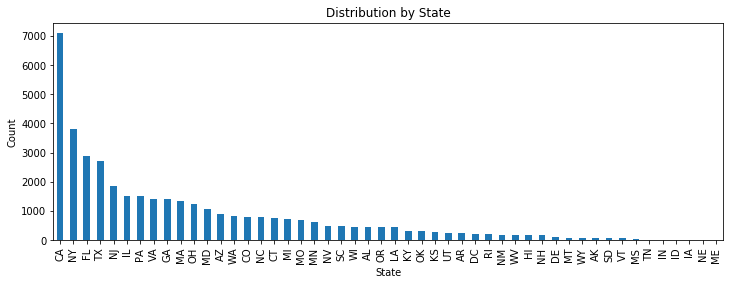

In [36]:
head_and_bar_plot(cleanedup_loan_data, 'addr_state', 'Distribution by State', 'State','Count')
# looks like a power law distribution for state with CA having highest accepted applications

# TODO - Can be removed  VK Comments - Changed this to bar plot to see top states

#### <font color='Maroon'>Insights - Majority of the business is in 10 states</font>

  verification_status
0  Verified          
1  Source Verified   
2  Not Verified      
3  Source Verified   
4  Source Verified   


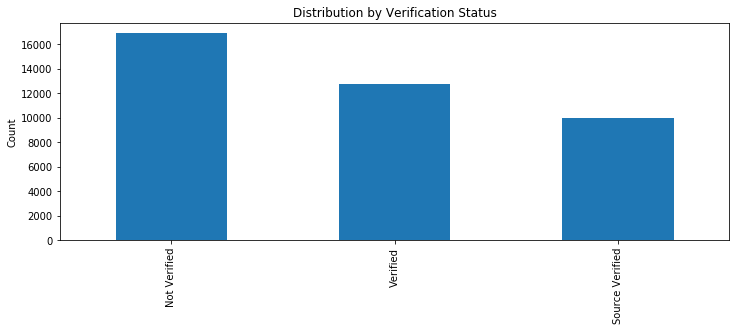

In [37]:
head_and_bar_plot(cleanedup_loan_data, 'verification_status', 'Distribution by Verification Status', '' ,'Count')

#### <font color='Maroon'>Insights - A significant portion of the loans shows are not verified</font>

          purpose
0  credit_card   
1  car           
2  small_business
3  other         
4  other         


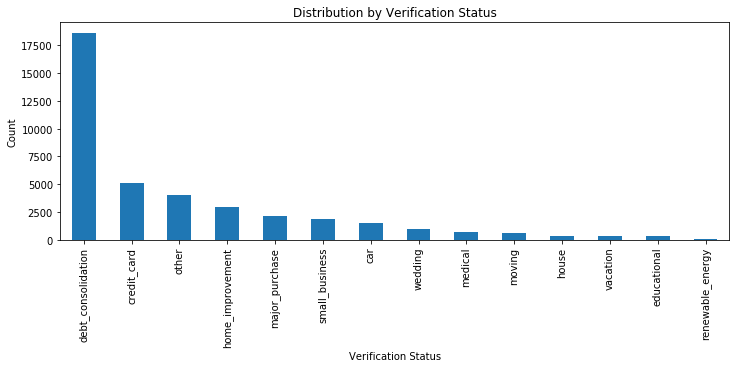

In [38]:
head_and_bar_plot(cleanedup_loan_data, 'purpose','Distribution by Verification Status', 'Verification Status' ,'Count')

#### <font color='Maroon'>Insights - Majority of loans taken are for Debt Consolidation</font>

  home_ownership
0  RENT         
1  RENT         
2  RENT         
3  RENT         
4  RENT         


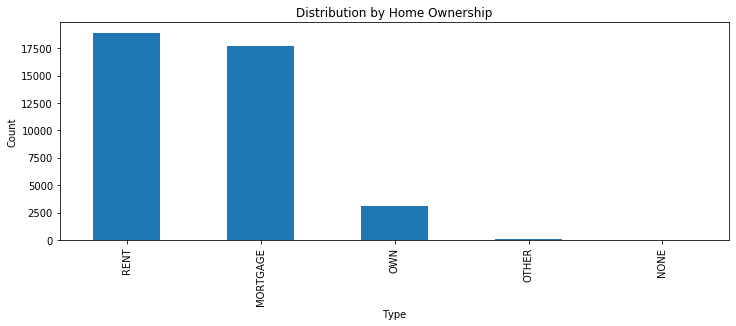

In [39]:
head_and_bar_plot(cleanedup_loan_data, 'home_ownership', 'Distribution by Home Ownership', 'Type' ,'Count')

#### <font color='Maroon'>Insights - Majority of loans taken are by people with rented / mortgaged homes</font>

#### Ordered categorical variables

         term
0   36 months
1   60 months
2   36 months
3   36 months
4   60 months


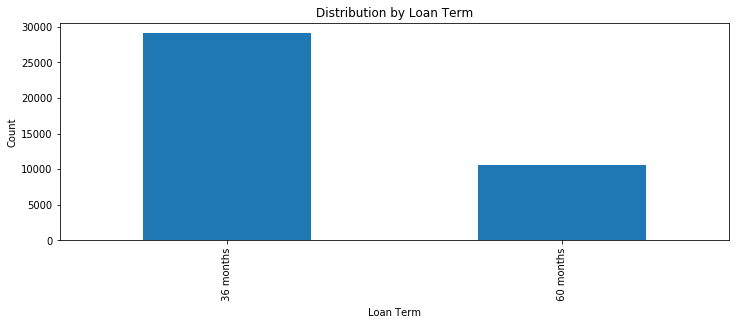

In [40]:
head_and_bar_plot(cleanedup_loan_data, 'term', 'Distribution by Loan Term', 'Loan Term' ,'Count')

In [41]:
# TODO - Check with is NotAvailable coming, it should not be there.

#### <font color='Maroon'>Insights - Almost 75% of the loans are of tenure 36 months</font>

In [42]:
cleanedup_loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years',
       'NotAvailable'], dtype=object)

In [43]:
# Replace the nan values in the table to NotAvailable
cleanedup_loan_data.loc[cleanedup_loan_data['emp_length'].isnull(), 'emp_length'] = 'NotAvailable'
cleanedup_loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years',
       'NotAvailable'], dtype=object)

  emp_length
0  10+ years
1  < 1 year 
2  10+ years
3  10+ years
4  1 year   


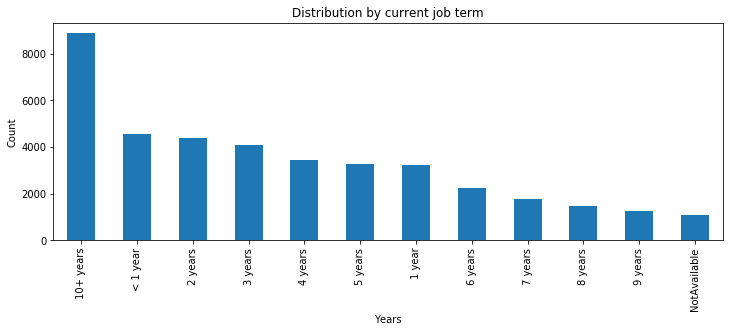

In [44]:
head_and_bar_plot(cleanedup_loan_data, 'emp_length', 'Distribution by current job term', 'Years' ,'Count')

#### <font color='Maroon'>Insights - Majority of Loans are given to people with  jobs. There are close to 1000 people who have not disclosed or are not in jobs</font>

  grade
0  B   
1  C   
2  C   
3  C   
4  B   


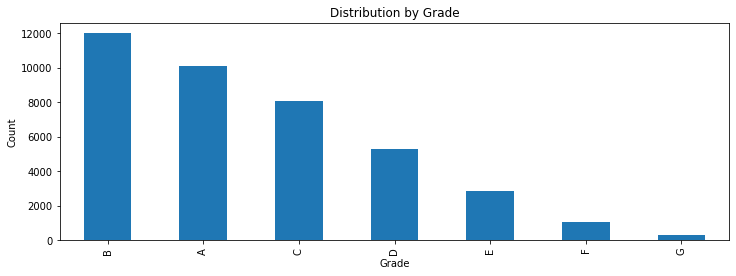

In [45]:
head_and_bar_plot(cleanedup_loan_data, 'grade', 'Distribution by Grade', 'Grade' ,'Count')

#### <font color='Maroon'>Insights - Majority of loans are with A,B and C gradings</font>

  sub_grade
0  B2      
1  C4      
2  C5      
3  C1      
4  B5      


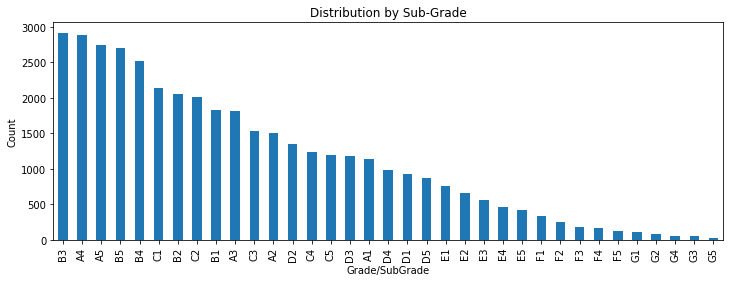

In [46]:
head_and_bar_plot(cleanedup_loan_data, 'sub_grade', 'Distribution by Sub-Grade', 'Grade/SubGrade' ,'Count')

#### <font color='Maroon'></font>

In [47]:
cleanedup_loan_data.emp_title.head()

0    NaN                     
1    Ryder                   
2    NaN                     
3    AIR RESOURCES BOARD     
4    University Medical Group
Name: emp_title, dtype: object

#### <font color='Maroon'>Insights - Employee Title Contains too much text, no processing done on this column</font>

   loan_status
0  Fully Paid 
1  Charged Off
2  Fully Paid 
3  Fully Paid 
4  Current    


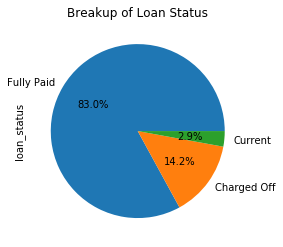

In [48]:
head_and_pie_plot(cleanedup_loan_data, 'loan_status', "Breakup of Loan Status")

#### <font color='Maroon'>Insights - 83.0% of loans have been closed, 14.2% of loans have gone bad</font>

   pub_rec
0  0      
1  0      
2  0      
3  0      
4  0      


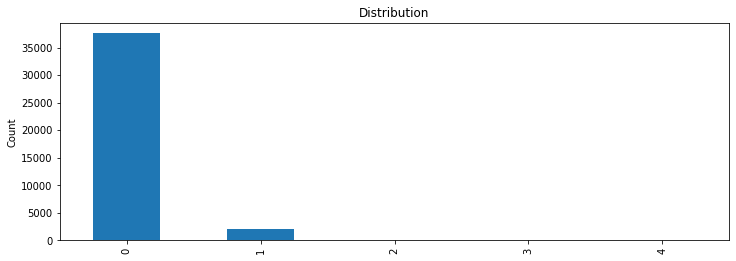

0    37601
1    2056 
2    51   
3    7    
4    2    
Name: pub_rec, dtype: int64

In [49]:
head_and_bar_plot(cleanedup_loan_data, 'pub_rec')

cleanedup_loan_data['pub_rec'].value_counts()
# one public record seems related to the number of defaults as well

#### <font color='Maroon'> </font>

  issue_d
0  Dec-11
1  Dec-11
2  Dec-11
3  Dec-11
4  Dec-11


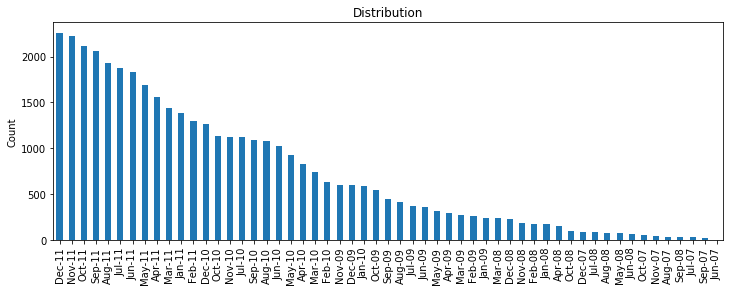

In [50]:
head_and_bar_plot(cleanedup_loan_data, 'issue_d')
# can possibly consider months impact

   inq_last_6mths
0  1             
1  5             
2  2             
3  1             
4  0             


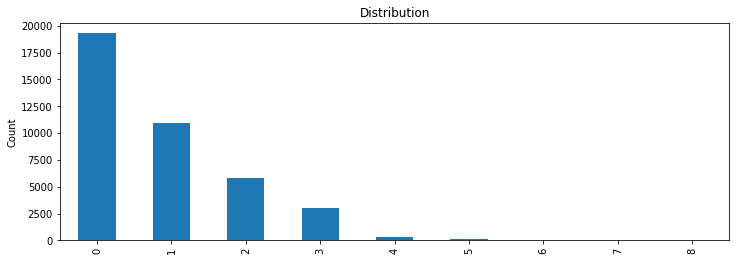

In [51]:
head_and_bar_plot(cleanedup_loan_data, 'inq_last_6mths')
# looks like not many loan applications with more than 4 inquiries were approved

   pub_rec_bankruptcies
0  0.0                 
1  0.0                 
2  0.0                 
3  0.0                 
4  0.0                 


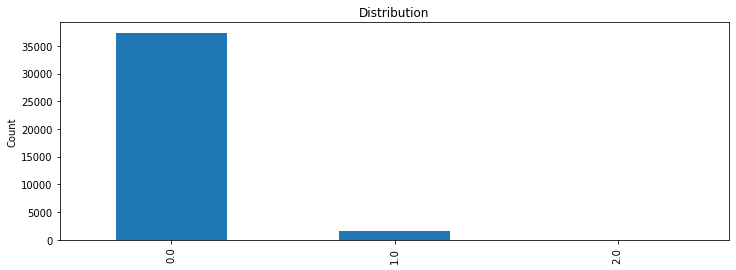

In [52]:
head_and_bar_plot(cleanedup_loan_data, 'pub_rec_bankruptcies')
# majority of loans are for 0 public record bankruptcies, but some given out for people with 1 records

   delinq_2yrs
0  0          
1  0          
2  0          
3  0          
4  0          


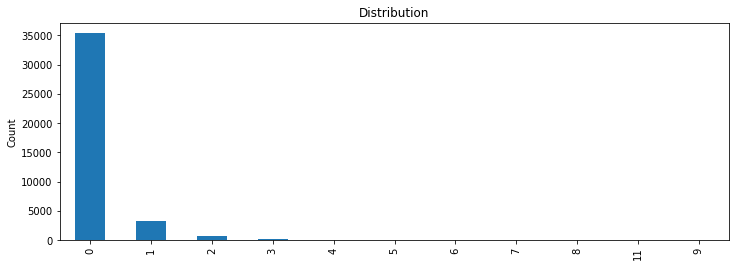

In [53]:
head_and_bar_plot(cleanedup_loan_data, 'delinq_2yrs')
# number 1 corresponds to default rate

   open_acc
0  3       
1  3       
2  2       
3  10      
4  15      


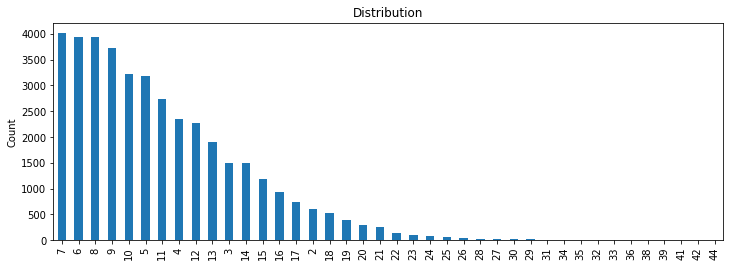

In [54]:
head_and_bar_plot(cleanedup_loan_data, 'open_acc')
# seems like people with 5-10 accs have highest applications

### Continuous variables

In [55]:
# convert interest rate to number
cleanedup_loan_data['int_rate'] = cleanedup_loan_data['int_rate'].apply(lambda x : float(x.split('%')[0]))
cleanedup_loan_data['revol_util'] = cleanedup_loan_data['revol_util'].apply(lambda x : float(str(x).split('%')[0]))

In [56]:
cleanedup_loan_data[['int_rate', 'loan_amnt', 'installment', 
                     'revol_bal', 'dti', 'funded_amnt',
                     'revol_util', 'annual_inc']].describe()

,int_rate,loan_amnt,installment,revol_bal,dti,funded_amnt,revol_util,annual_inc
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39667.000000,3.971700e+04
mean,12.021177,11219.443815,324.561922,13382.528086,13.315130,10947.713196,48.832152,6.896893e+04
std,3.724825,7456.670694,208.874874,15885.016641,6.678594,7187.238670,28.332634,6.379377e+04
min,5.420000,500.000000,15.690000,0.000000,0.000000,500.000000,0.000000,4.000000e+03
25%,9.250000,5500.000000,167.020000,3703.000000,8.170000,5400.000000,25.400000,4.040400e+04
50%,11.860000,10000.000000,280.220000,8850.000000,13.400000,9600.000000,49.300000,5.900000e+04
75%,14.590000,15000.000000,430.780000,17058.000000,18.600000,15000.000000,72.400000,8.230000e+04
max,24.590000,35000.000000,1305.190000,149588.000000,29.990000,35000.000000,99.900000,6.000000e+06


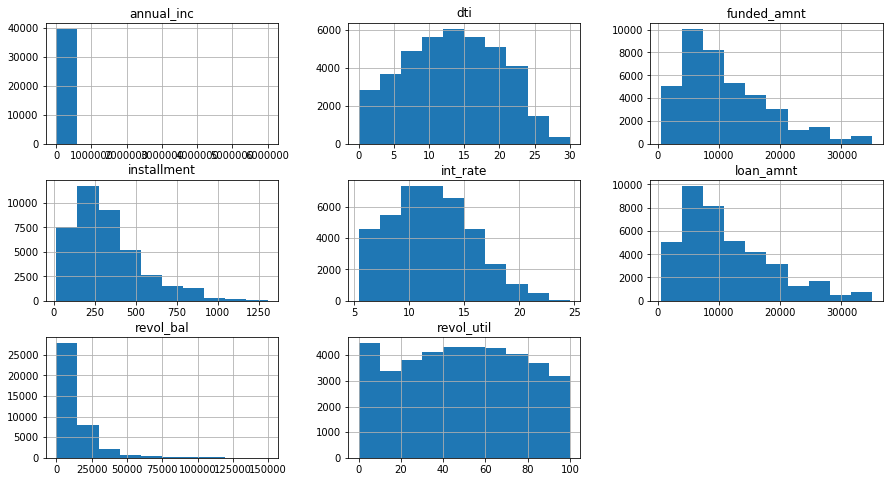

In [57]:
cleanedup_loan_data[['int_rate', 'loan_amnt', 'installment', 
                     'revol_bal', 'dti', 'funded_amnt',
                     'revol_util', 'annual_inc']].hist(figsize=(15,8))
plt.show()

#### <font color='Maroon'> </font>

In [62]:
# visualize outlier removal
def box_plot_remove_outlier(df, col, val):
    plt.figure(figsize=(12, 6))
    print(f'{col} : outlier cutoff={val}')
    df[[col]].plot.box(ax=plt.subplot(121))
    df[df[col] <= val][col].plot.box(ax=plt.subplot(122))
    plt.show()

int_rate : outlier cutoff=22


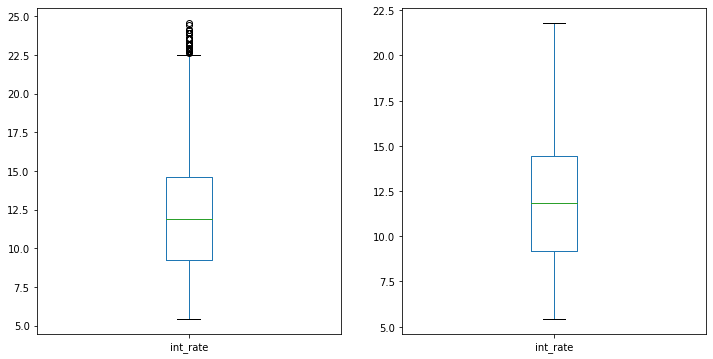

loan_amnt : outlier cutoff=28000


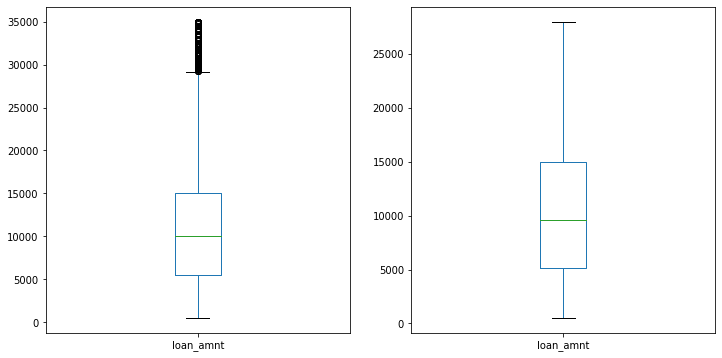

installment : outlier cutoff=750


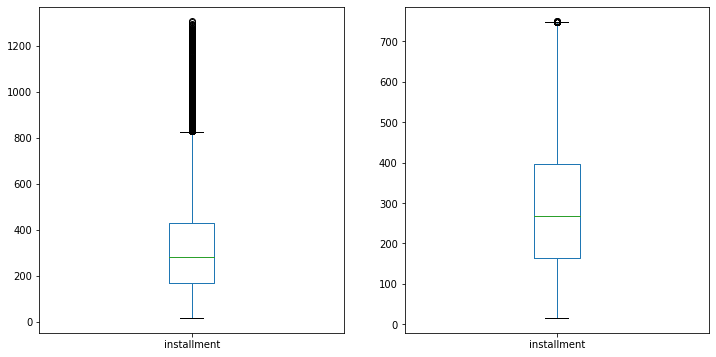

revol_bal : outlier cutoff=28000


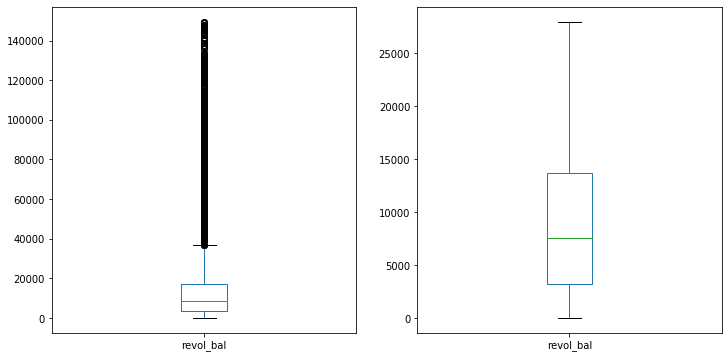

dti : outlier cutoff=30


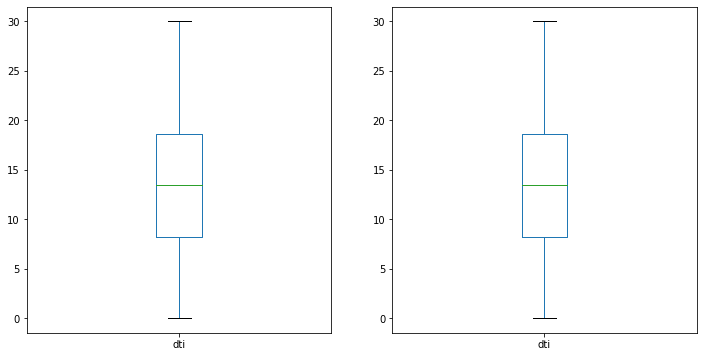

funded_amnt : outlier cutoff=30000


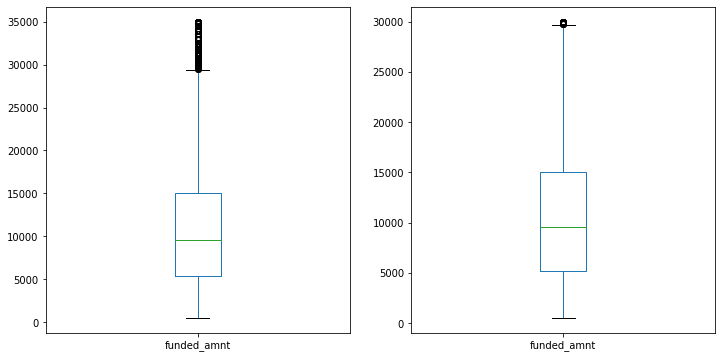

revol_util : outlier cutoff=100


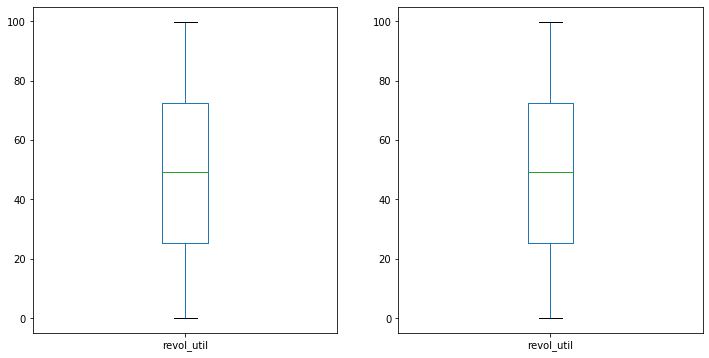

annual_inc : outlier cutoff=82300.0


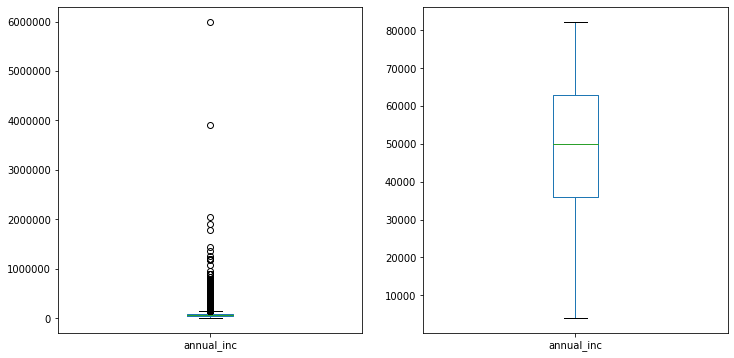

In [63]:
outlier_maps = {'int_rate': 22, # dont want to apply outlier treatment
                'loan_amnt': 28000,
                'installment': 750, 
                'revol_bal': 28000, 
                'dti': 30, 
                'funded_amnt': 30000,
                'revol_util': 100, 
                'annual_inc': 8.230000e+04}
for col, val in outlier_maps.items():
    box_plot_remove_outlier(cleanedup_loan_data, col, val)


### Segemented Univariate Analysis

##### Loan processing being the key objective we are looking at 2 kinds of analysis. Defaulted loans and Good or paid up loans. The Loans that are currently active will be excluded from the study

In [86]:
# Reusable Functions

def group_and_default_rate(col, ptitle='Defaults Distribution', pxlabel='', pylabel='Percent'):
    p_table = cleanedup_loan_data.groupby([col, 'loan_status']).count()[['id']]
    p_table = p_table.reset_index()
    totals_table = p_table.groupby(col).sum()
    p_table['totals'] = p_table[col].apply(lambda x : totals_table.loc[x]['id'])
    p_table['rate'] = round(100*(p_table['id']/p_table['totals']))

    p_table[p_table['loan_status'] == 'Charged Off'][[col, 'rate']] \
            .sort_values('rate', ascending=False) \
            .head(50) \
            .plot.bar(x=col, y='rate', figsize=(18, 6))
    plt.xticks(rotation=90)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)   
    # total charged off loans are 14% of total
    plt.axhline(y=14, linewidth=0.75, color='r', ls='--')  #label='Average Default')
    #plt.show()
    print(p_table[p_table['loan_status'] == 'Charged Off'][[col, 'rate']].describe())
    plt.legend()
    plt.show()

            rate
count  47.000000
mean   14.702128
std    7.345258 
min    5.000000 
25%    12.000000
50%    13.000000
75%    15.500000
max    60.000000


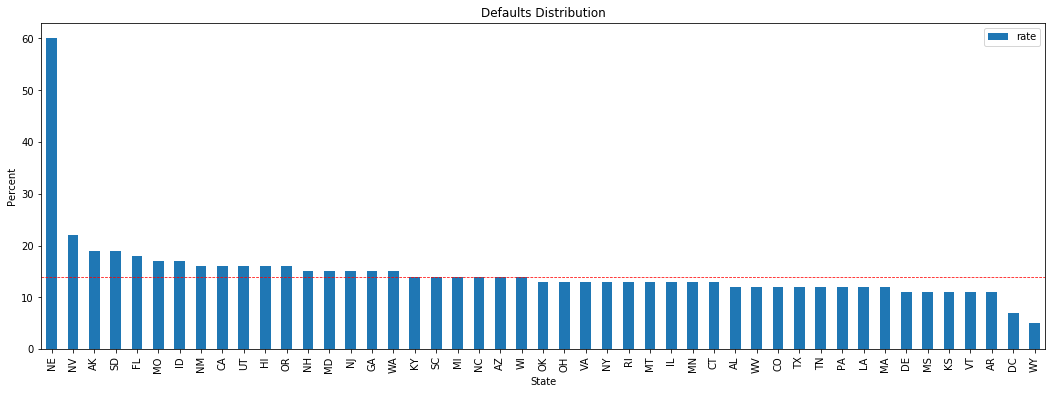

In [88]:
# is there any relation w.r.t addr_state and default rate
group_and_default_rate('addr_state', pxlabel='State')

# Nebraska and Nevada have unusually high rate of defaults

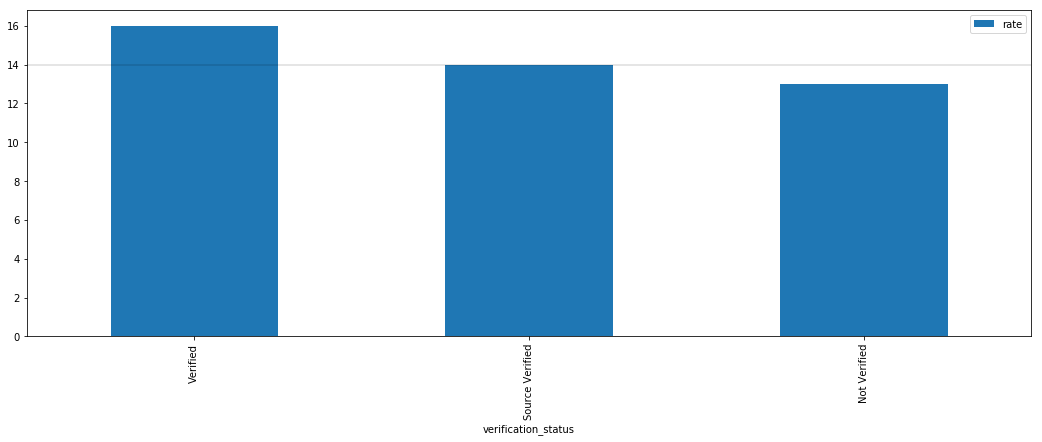

            rate
count  3.000000 
mean   14.333333
std    1.527525 
min    13.000000
25%    13.500000
50%    14.000000
75%    15.000000
max    16.000000


In [141]:
# is there any relation w.r.t verification_status and default rate
group_and_default_rate('verification_status')
# not much difference, infact verified applicants have higher default rate!

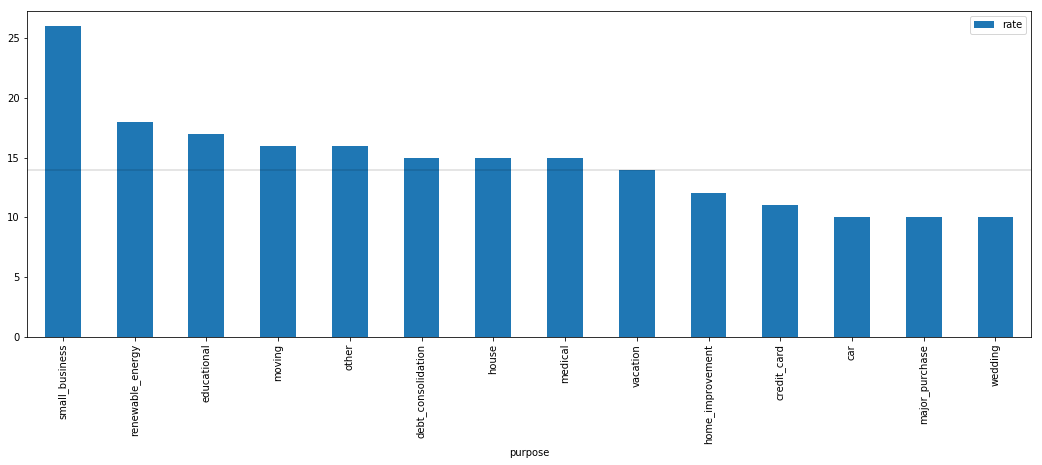

            rate
count  14.000000
mean   14.642857
std    4.253635 
min    10.000000
25%    11.250000
50%    15.000000
75%    16.000000
max    26.000000


In [142]:
# is there any relation w.r.t purpose of loan and default rate
group_and_default_rate('purpose')
# very IMP - small_business loans have higher share of default rates

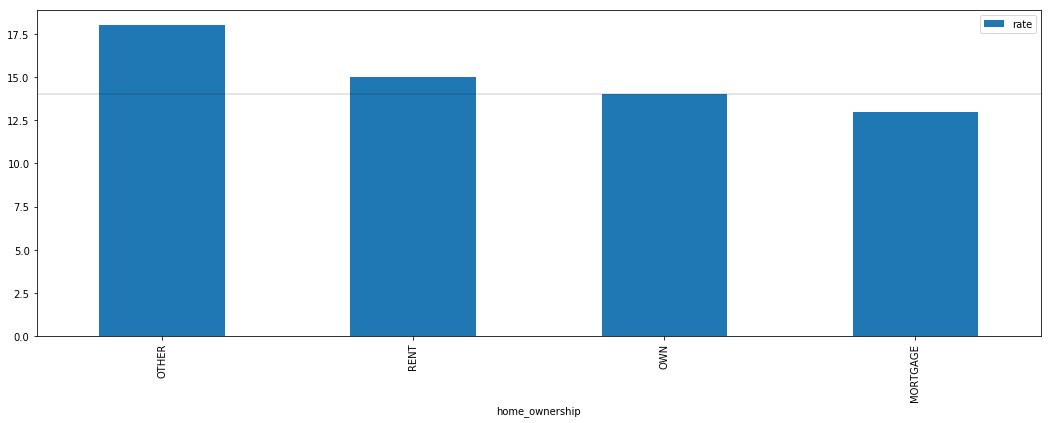

            rate
count  4.000000 
mean   15.000000
std    2.160247 
min    13.000000
25%    13.750000
50%    14.500000
75%    15.750000
max    18.000000


In [143]:
# is there any relation w.r.t home_ownership and default rate
group_and_default_rate('home_ownership')
# not sure what others refer to. But people with mortgage have less rate.

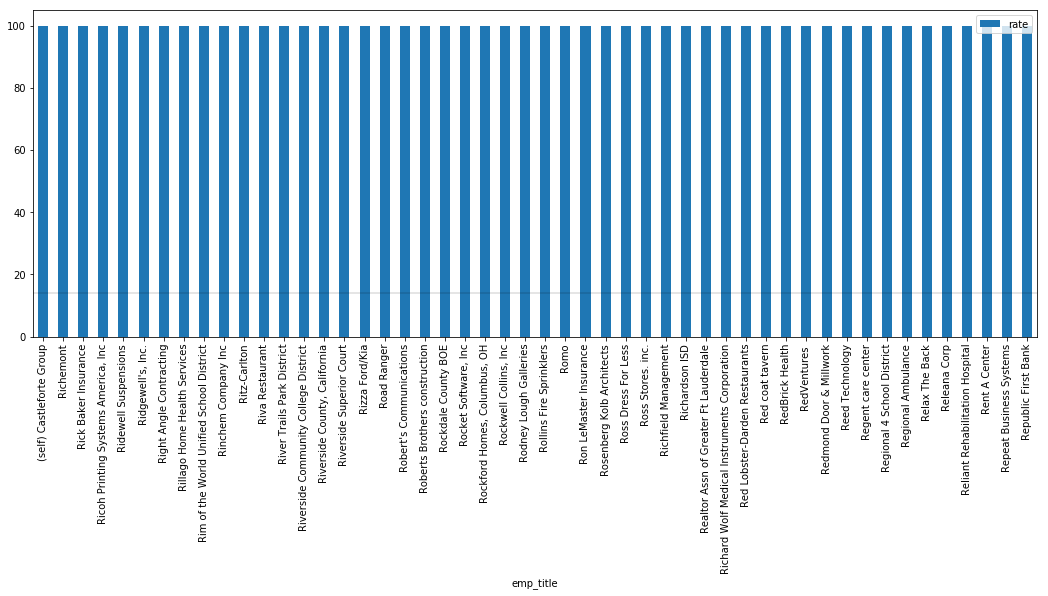

              rate
count  4636.000000
mean   88.562985  
std    25.417857  
min    3.000000   
25%    100.000000 
50%    100.000000 
75%    100.000000 
max    100.000000 


In [144]:
# is there any relation w.r.t home_ownership and default rate
group_and_default_rate('emp_title')
# looks like people have 100% default rate from specific companies.

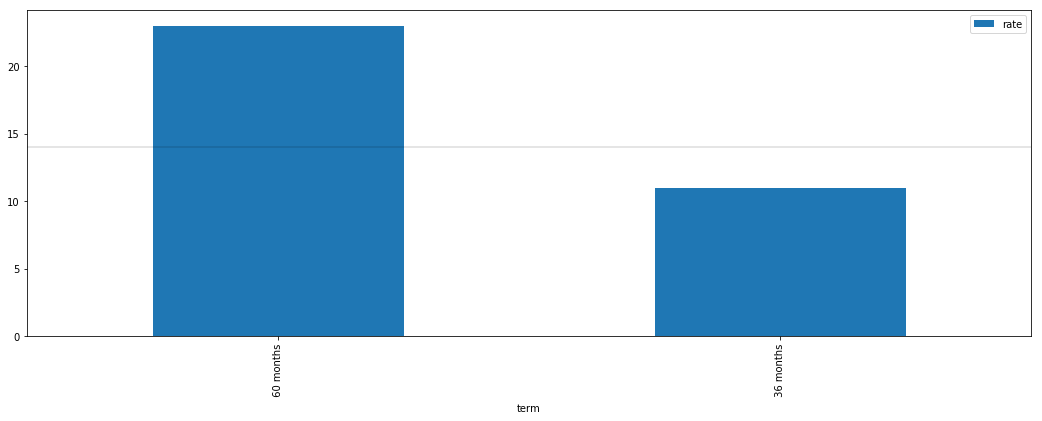

            rate
count  2.000000 
mean   17.000000
std    8.485281 
min    11.000000
25%    14.000000
50%    17.000000
75%    20.000000
max    23.000000


In [145]:
# is there any relation w.r.t term and default rate
group_and_default_rate('term')
# longer duration loans have higher default rate

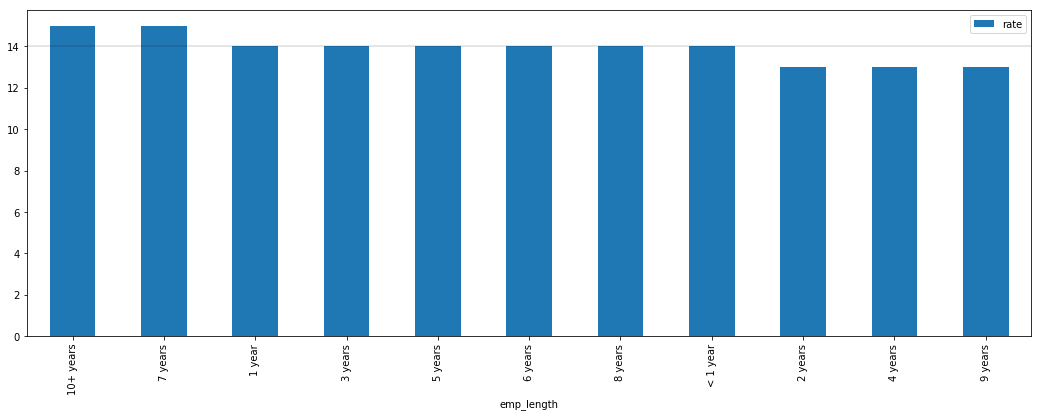

            rate
count  11.000000
mean   13.909091
std    0.700649 
min    13.000000
25%    13.500000
50%    14.000000
75%    14.000000
max    15.000000


In [147]:
# is there any relation w.r.t emp_length and default rate
group_and_default_rate('emp_length')
# not much relation.

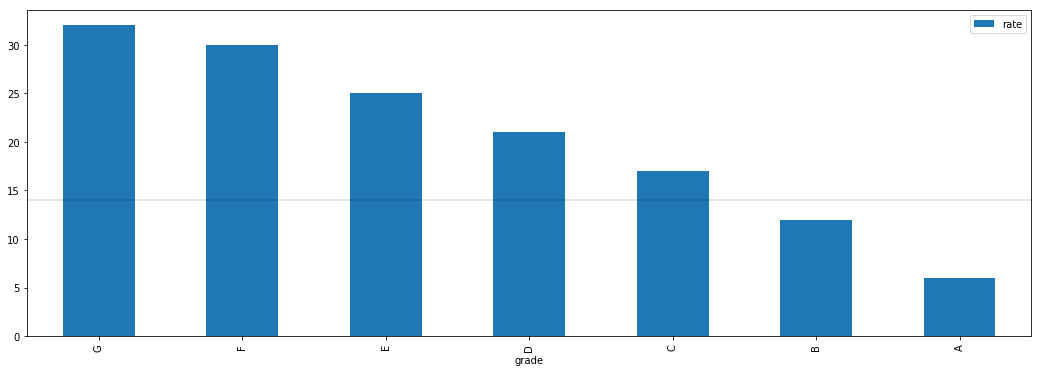

            rate
count  7.000000 
mean   20.428571
std    9.466734 
min    6.000000 
25%    14.500000
50%    21.000000
75%    27.500000
max    32.000000


In [148]:
# is there any relation w.r.t grade and default rate
group_and_default_rate('grade')
# Only A and to some extent B grades are better performers.

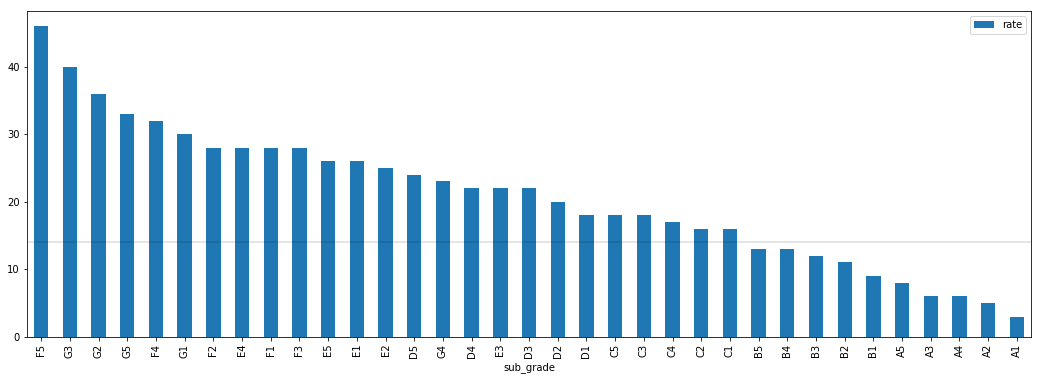

            rate
count  35.000000
mean   20.800000
std    10.260719
min    3.000000 
25%    13.000000
50%    22.000000
75%    28.000000
max    46.000000


In [149]:
# is there any relation w.r.t sub_grade and default rate
group_and_default_rate('sub_grade')
# some sub grades have out of norm performances.

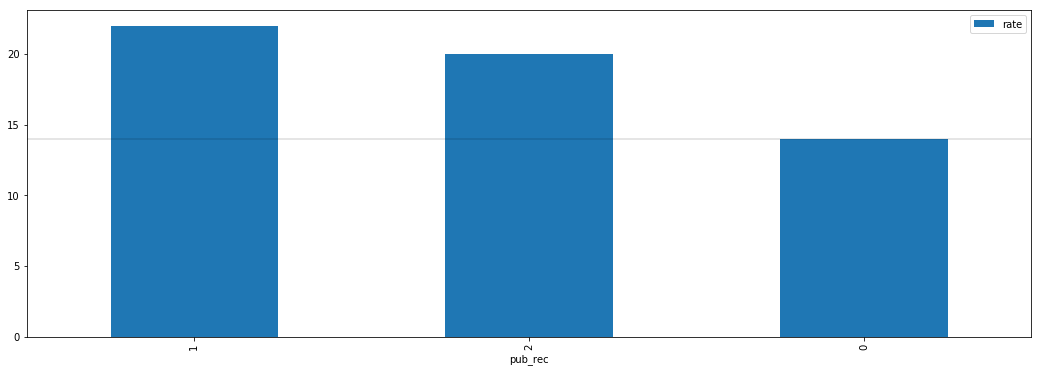

       pub_rec       rate
count  3.0      3.000000 
mean   1.0      18.666667
std    1.0      4.163332 
min    0.0      14.000000
25%    0.5      17.000000
50%    1.0      20.000000
75%    1.5      21.000000
max    2.0      22.000000


In [150]:
# is there any relation w.r.t pub_rec and default rate
group_and_default_rate('pub_rec')
# on expected lines - people with 1/2 pub_recs have higher default rate.

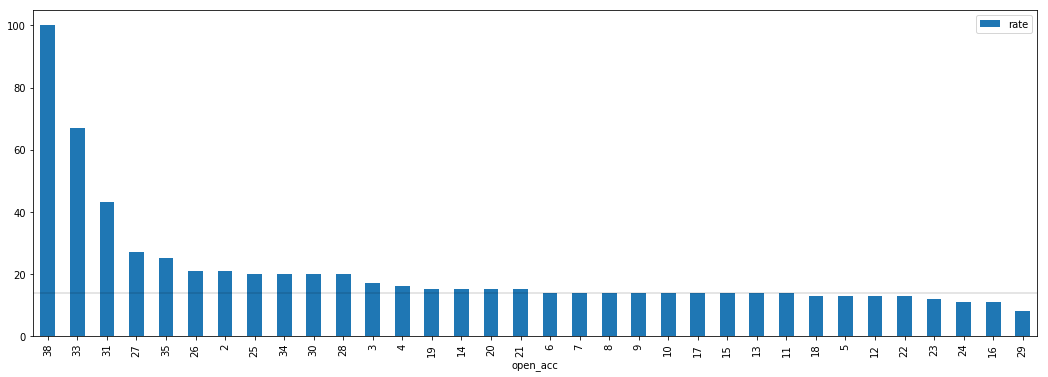

        open_acc       rate
count  34.000000  34.00000 
mean   18.676471  20.50000 
std    10.253516  17.59864 
min    2.000000   8.00000  
25%    10.250000  14.00000 
50%    18.500000  14.50000 
75%    26.750000  20.00000 
max    38.000000  100.00000


In [151]:
# is there any relation w.r.t open_acc and default rate
group_and_default_rate('open_acc')
# not sure what to make out of it.